<h1 style="text-align:center">Machine Learning Challenge</h1>
por: Diego Rivera

<b>Contexto del caso:</b><br>
En una de las etapas de un proyecto que estás trabajando para Empresas Woollahra, tienes que predecir los ingresos de una persona dado un dataset que ya tienes armado (ingresos.csv). Mediante un algoritmo de clasificación (aprendizaje supervisado) realiza esta predicción [(<=50 K) = 0, (>50 K)=1] en función de sus características (edad, género, etc).

<b>Preguntas 1:</b>
1.	Desarrolla el notebook en Python que te permite hacer la predicción requerida
2.	Explica el uso que le diste a cada una de las librerías utilizadas
3.	Explica a grandes rasgos lo que hace tu código y las características utilizadas
4.	Explica el rendimiento de tu modelo

Todo lo relacionado a este ejercicio debe entregarse como parte del Notebook. Para esto, comenta las diferentes secciones de tu código.

----------------------------------------------------------------------------------------------------------------

Declaración de las importaciones de las principales librerías <i>(módulos)</i> para facilitar la manipulación y visualización de datos, además de la generación del modelo predictivo para el desarrollo del ejercicio:

<ul>
   <li><i><b>pandas</b></i> librería utilizada principalmente para la gestión y el análisis de estructuras de datos, como listas, series y dataframes.</li>
<br>
   <li><i><b>numPy</b></i> librería utilizada principalmente en el cálculo numérico - matemático y análisis de datos, ideal para grandes volúmenes de datos.</li>
<br>
   <li><i><b>matplotlib</b></i> es una interfaz basada en estado para Matplotlib. Proporciona una forma similar a MATLAB de graficar.</li>
<br>
   <li><i><b>pyplot</b></i> está destinado principalmente a gráficos interactivos y casos simples de generación de gráficos programáticos, matplotlib.pyplot es una interfaz basada en estado para Matplotlib. Proporciona una forma de graficar similar a MATLAB.</li>
<br>
   <li><i><b>seaborn</b></i> es una librería que usa Matplotlib por <i>"debajo"</i> para trazar gráficos. Se utilizará principalmente para visualizar distribuciones aleatorias.</li>
<br>
<li><i><b>category_encoders</b></i> Es un librería que facilita enormemente la codificación de variables categóricas en numéricas con diferentes técnicasde estilo scikit-learn.</li>
<br>
<li><i><b>scikit-learn-(sklearn)</b></i> es una de las librerías de machine learning más populares en Python. Scikit-learn contiene muchas herramientas eficientes para machine learning y modelado estadístico, incluyendo clasificación, regresión, clustering, y reducción de dimensionalidad, ademas de algoritmos como support-vector machines, random forests, gradient boosting, k-means and DBSCAN; interactuando eficientemente con otras librerías de Python como numpy y scipy.</li>
<br>
<li><i><b>warnings</b></i> librería que permite omitir advertencias de python en cuanto versionamiento de módulos u otras librerías y funciones en el código en ejecución, permitiendo mejorar la presentación del proyecto a trabajar en el <i>notebook</i> buscando emular un reporte más ejecutivo o académico.</li>
</ul>

In [2]:
!pip install --upgrade pandas


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Importando pandas para manejo de estructura de datos
import pandas as pd

# Importando numpy para tratamiento numérico/matemático de los datos
import numpy as np

# Importando librerías para visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import category encoders
import category_encoders as ce

##########################################################################
# Importando distintos módulos de la libería scikit-learn

# Importando el módulo Train/test split + computing accuracy
from sklearn.model_selection import train_test_split

# Importando for feature scaling
from sklearn.preprocessing import RobustScaler

# Import el algoritmo de clasificación RandomForest
from sklearn.ensemble import RandomForestClassifier

# Importando el módulo de accuracy score para chequear los resultados del modelo 
from sklearn.metrics import accuracy_score

# Importando el módulo para cálculo de la matriz de confusión
from sklearn.metrics import confusion_matrix

# Importando el módulo de reporte de clasificación
from sklearn.metrics import classification_report

##########################################################################
import warnings
warnings.filterwarnings('ignore')

In [4]:
# lectura del set de datos a analizar y trabajar, asignándolo a una variable de tipo dataframe para facilitar
# los análisis numéricos necesarios a realizar y facilitar al mismo tiempo la manipulación de los datos.
# De acuerdo con el contexto del ejercicio, la variable se llamará "ingresos"
ingresos = pd.read_csv("ingresos.csv")

In [5]:
# examinando el dataframe
ingresos.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Si bien lo ideal es poder realizar un pequeño resumen de las variables presentes en el set de datos a analizar (a modo de diccionario de datos), por temas de tiempo omitiré esta etapa dado que a simple vista todas la variables en cuestión son relaventes para el obtivo del ejercicio planteado.

In [6]:
# comprobando la no existencia de "missing values" en el dataframe de ingresos
print("'Missing Values' para set de datos de ingresos:")
print(ingresos.isnull().sum())

'Missing Values' para set de datos de ingresos:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [7]:
# comprobando el tamaño del dataframe de ingresos
print("Tamaño del set de datos de ingresos:")
print(ingresos.shape)

Tamaño del set de datos de ingresos:
(48842, 15)


In [8]:
# revisando el tipo de datos del set de datos de ingresos
print("Data Types del set de datos de ingresos:")
print(ingresos.dtypes)

Data Types del set de datos de ingresos:
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [9]:
# revisando estadísticos descriptivos de las variables numéricas del set de ingresos
ingresos.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.64,13.71,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.13,105604.03,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.08,2.57,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.07,7452.02,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.50,403.00,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.42,12.39,1.0,40.0,40.0,45.0,99.0


Se aprecian a primera vista datos sin mayores distorciones u alteraciones. Matemáticamente podrían haber casos de valores outliers, sin embargo dada la naturaleza de la variable y el contexto del ejercicio parecen ser normales. Se evualará más adelante.

<b>Explorando Variables Categóricas (Descriptivas)</b>

In [15]:
# Contando el total de registros por cada variable descriptivas (categóricas) del set de datos de ingresos para 
# dimensionar el scope cada una de ellas e intuir el real alcance de cada variable.
categorica = [var for var in ingresos.columns if ingresos[var].dtype=='O']

print('Se cuenta con {} variables categóricas.'.format(len(categorica)))
print('Estas son :\n', categorica)

Se cuenta con 9 variables categóricas.
Estas son :
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [16]:
# Contando el total de registros por cada variable categórica del set de datos de ingresos para dimensionar 
# el scope cada una de ellas e intuir el real alcance de cada variable..
for var in categorica:     
    print(ingresos[var].value_counts())
    print("\n")

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

Se aprecian algunas variables con datos con valores <i>'?'</i>. Si bien no se trata de <i>"missing values"</i> de manera explícita, en la práctica no aportan ningún valor al análisis y es como si lo fueran, por cual serán omitidos en el análisis y desarrollo del ejercicio.

In [17]:
# reemplazando valores '?' en con `NaN` en variable workclass 
ingresos.workclass.replace('?', np.NaN, inplace=True)

# reemplazando valores '?' en con `NaN` en variable occupation
ingresos.occupation.replace('?', np.NaN, inplace=True)

# reemplazando valores '?' en con `NaN` en variable native-country
ingresos['native-country'].replace('?', np.NaN, inplace=True)

In [19]:
# Validando la nueva distribución y frecuencia de valores de la variable workclass, sin valores '?'
ingresos.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [18]:
# Validando la nueva distribución y frecuencia de valores de la variable occupation, sin valores '?'
ingresos.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [20]:
# Validando la nueva distribución y frecuencia de valores de la variable native-country, sin valores '?'
ingresos['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [21]:
# comprobando la existencia de estos nuevos "missing values" en el dataframe de ingresos
print("'Missing Values' para set de datos de ingresos:")
print(ingresos.isnull().sum())

'Missing Values' para set de datos de ingresos:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [22]:
# Eliminando todos los nuevos  missing values del set de datos
ingresos = ingresos.dropna()

In [24]:
# comprobando la no existencia de estos nuevos "missing values" en el dataframe de ingresos
print("'Missing Values' para set de datos de ingresos:")
print(ingresos.isnull().sum())

'Missing Values' para set de datos de ingresos:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [23]:
# comprobando el nuevo tamaño del dataframe de ingresos. Con una cantidad de filas menores a la original (48842)
# pero igual de significativa para continuar con el desarrollo del ejercicio.
print("Tamaño del set de datos de ingresos:")
print(ingresos.shape)

Tamaño del set de datos de ingresos:
(45222, 15)


In [25]:
# verificando la cardinalidad en variables categóricas
for var in categorica:
    print(var, ' contiene ', len(ingresos[var].unique()), ' registros únicos')

workclass  contiene  7  registros únicos
education  contiene  16  registros únicos
marital-status  contiene  7  registros únicos
occupation  contiene  14  registros únicos
relationship  contiene  6  registros únicos
race  contiene  5  registros únicos
gender  contiene  2  registros únicos
native-country  contiene  41  registros únicos
income  contiene  2  registros únicos


In [26]:
# viendo el peso (porcentaje) de distribución de frecuencia de los valores de la variable objetivo.
ingresos.income.value_counts(normalize=True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

Si bien podría creerse que se trata de data desbalanceada, la verdad es que no lo es. Es la realidad, muy lógica por cierto, de que las un poco más de un 75% de las personas de estos 41 países distintos tengan ingresos iguales o menores a 50K unidades monetarias, y menos de un 25% tengo ingresos mayores a 50K unidades monetarias.

<b>Visualizando Variables Categóricas (Descriptivas)</b>

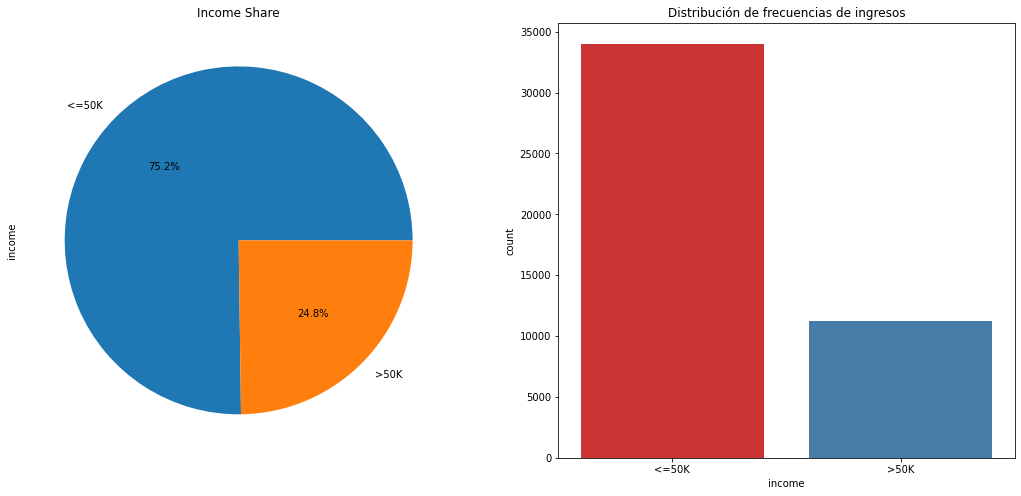

In [34]:
# visualizando la distribución de frecuencias de la variable income

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = ingresos['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Income Share')

ax[1] = sns.countplot(x="income", data=ingresos, palette="Set1")
ax[1].set_title("Distribución de frecuencias de ingresos")

plt.show()

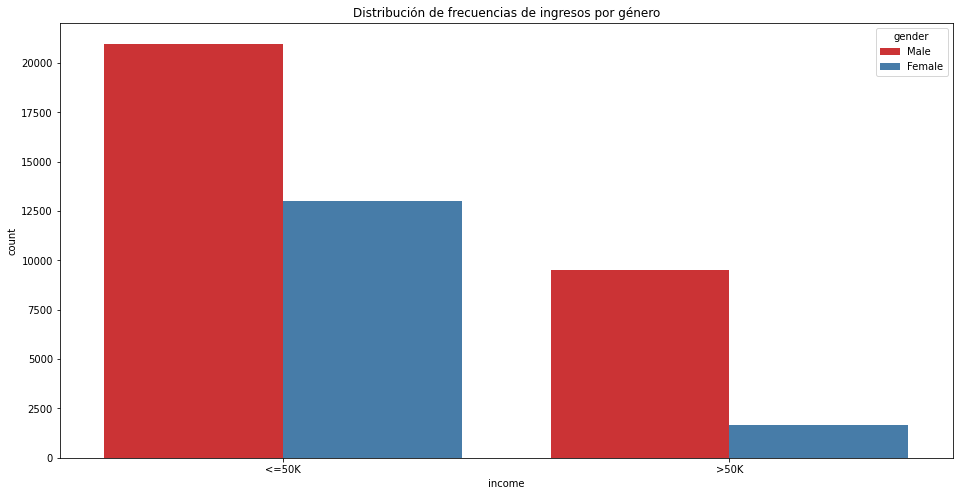

In [33]:
# Visualizando income por tipo de género (variable gender)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="income", hue="gender", data=ingresos, palette="Set1")
ax.set_title("Distribución de frecuencias de ingresos por género")
plt.show()

se aprecia mayores registros de ingresos de hombres que de mujeres.

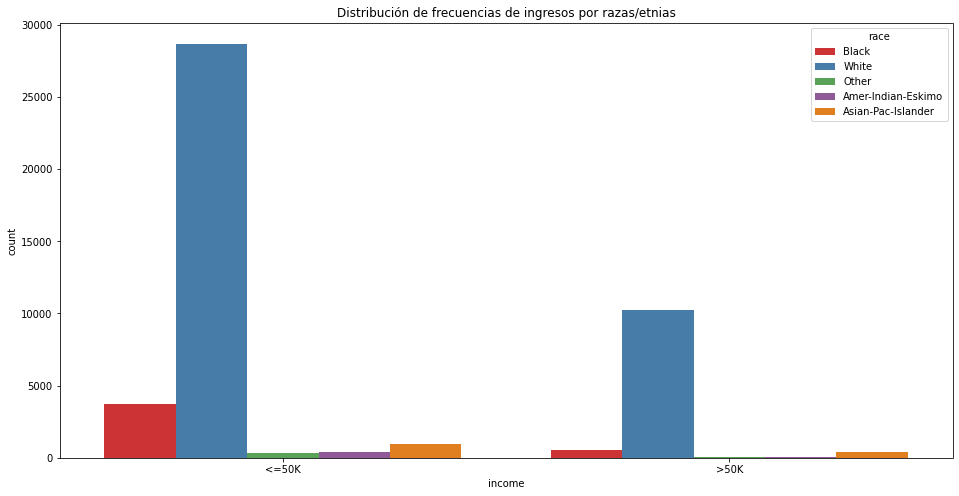

In [35]:
# Visualizando income por tipos de razas o etnias (variable race)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="income", hue="race", data=ingresos, palette="Set1")
ax.set_title("Distribución de frecuencias de ingresos por razas/etnias")
plt.show()

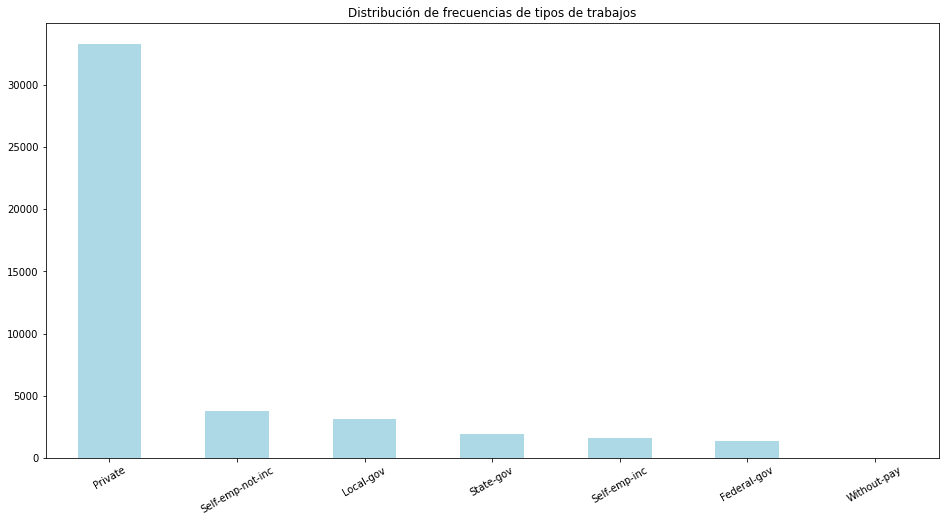

In [38]:
# Visualizando tipos trabajos (variable worclass)
f, ax = plt.subplots(figsize=(16, 8))
ax = ingresos.workclass.value_counts().plot(kind="bar", color="lightblue")
ax.set_title("Distribución de frecuencias de tipos de trabajos")
ax.set_xticklabels(ingresos.workclass.value_counts().index, rotation=30)
plt.show()

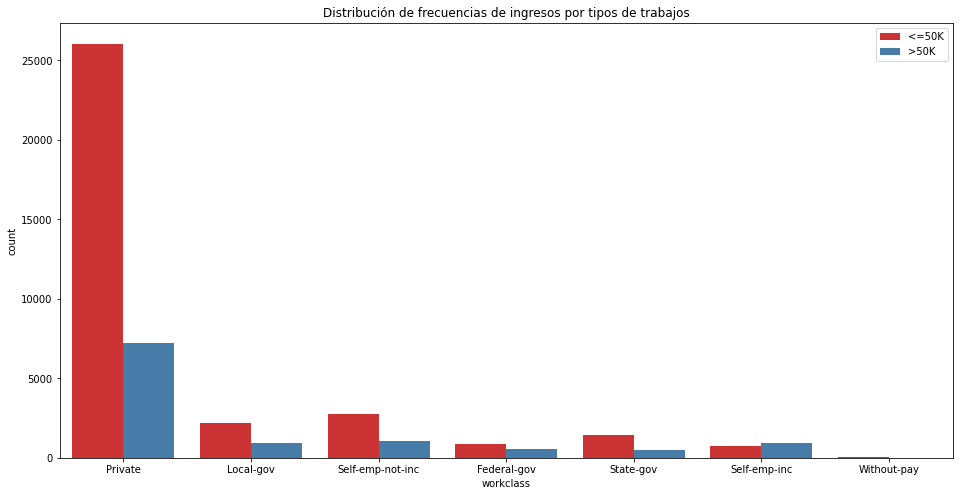

In [39]:
# # Visualizando income tipos trabajos (variable worclass)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="workclass", hue="income", data=ingresos, palette="Set1")
ax.set_title("Distribución de frecuencias de ingresos por tipos de trabajos")
ax.legend(loc='upper right')
plt.show()

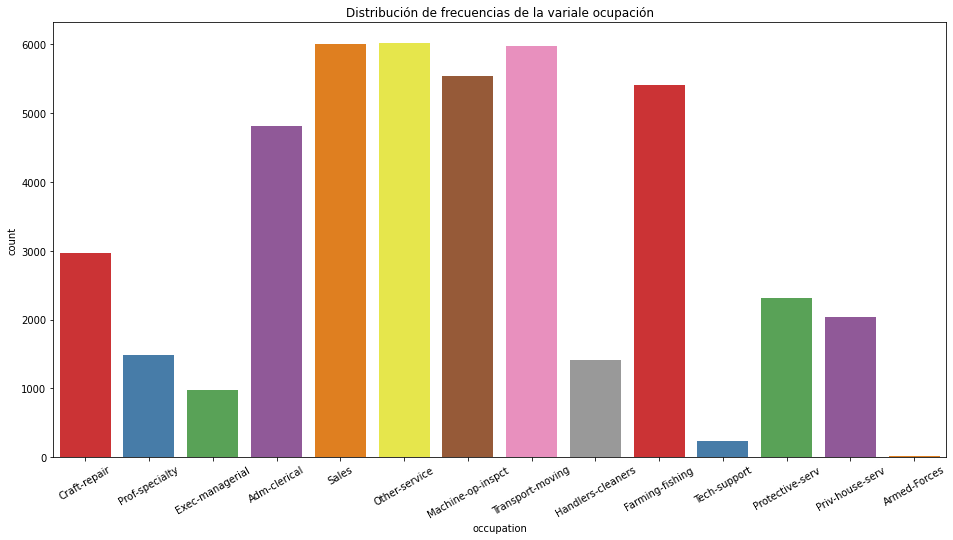

In [40]:
# Visualizando variable ocupaciones (variable occupation)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="occupation", data=ingresos, palette="Set1")
ax.set_title("Distribución de frecuencias de la variale ocupación")
ax.set_xticklabels(ingresos.occupation.value_counts().index, rotation=30)
plt.show()

In [41]:
# Recordando el total de paises al cual pertenecen las personas del registro de datos.
ingresos['native-country'].nunique()

41

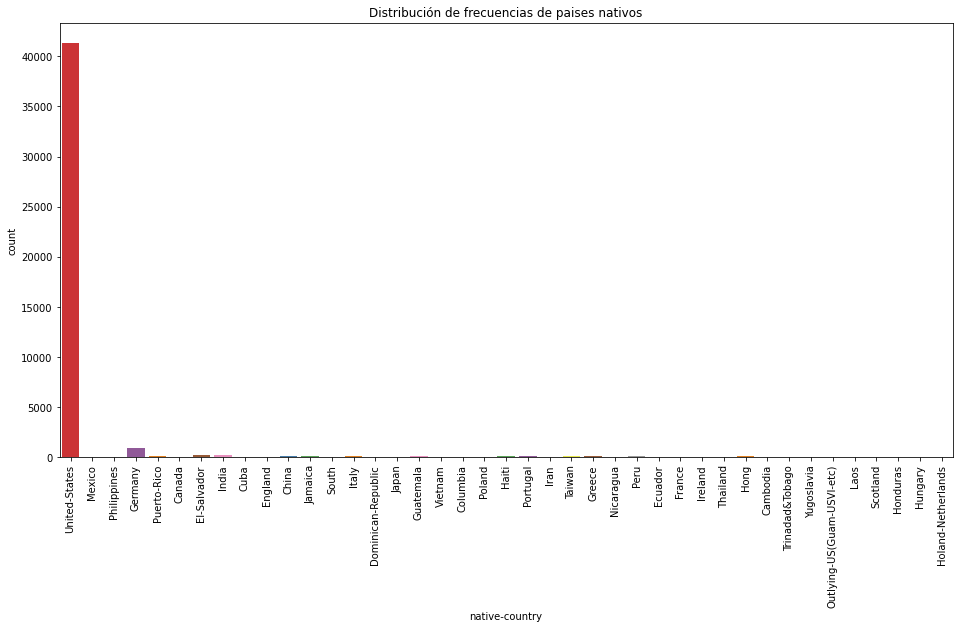

In [42]:
# Visualizando paises (variable native-country)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="native-country", data=ingresos, palette="Set1")
ax.set_title("Distribución de frecuencias de paises nativos")
ax.set_xticklabels(ingresos['native-country'].value_counts().index, rotation=90)
plt.show()

Casi la totalidad de los registros pertenece a personas de E.E.U.U, asumiendo como nativos (ciudadados), de acuerdo con la descripción de la variable.

<h4>Explorando Variables Numéricas</h4>

In [43]:
# Contando el total de registros por cada variable numéricas del set de datos de ingresos para dimensionar el
# scope cada una de ellas e intuir el real alcance de cada variable.
numerica = [var for var in ingresos.columns if ingresos[var].dtype!='O']

print('Se cuenta con {} variables numéricas'.format(len(numerica)))
print('Estas son :\n', numerica)

Se cuenta con 6 variables numéricas
Estas son :
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [44]:
# vista de registros de cada tipo de variable numéica
ingresos[numerica].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30


In [45]:
# comprobando la no existencia de 'missing values'
ingresos[numerica].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

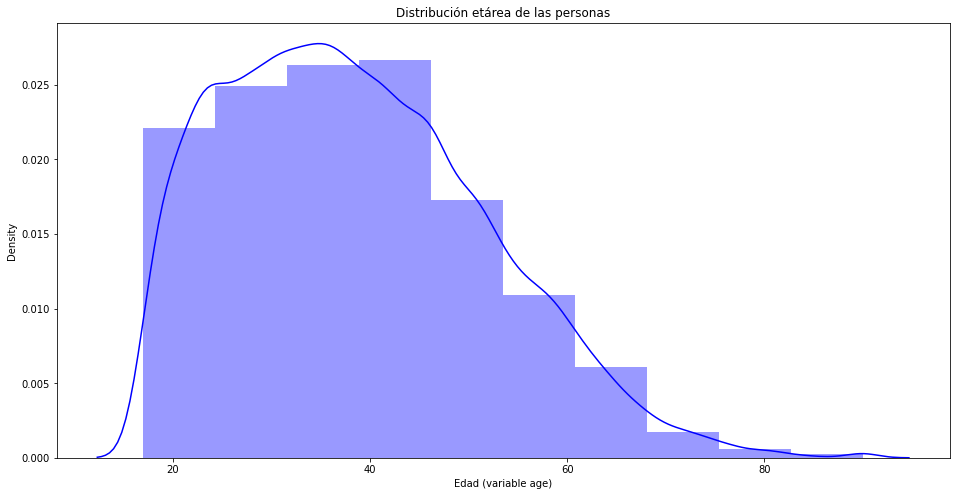

In [48]:
# Visualizando la distribución de las edades de las personas en los registros del set de datos ingresos
f, ax = plt.subplots(figsize=(16,8))
x = ingresos['age']
x = pd.Series(x, name="Edad (variable age)")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribución etárea de las personas")
plt.show()

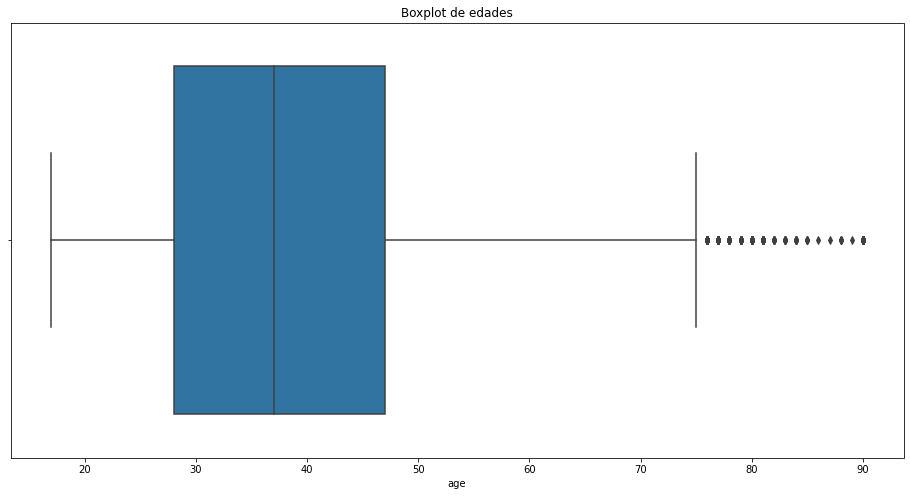

In [49]:
# Visualización de boxplot de las edades
f, ax = plt.subplots(figsize=(16,8))
x = ingresos['age']
ax = sns.boxplot(x)
ax.set_title("Boxplot de edades")
plt.show()

Dado a las mejores en condiciones y expectativas de vida de las personas en las últimas décadas y en los contextos de crísis económicas vividas desde finales de los 90 en inicios de la década del 2000, es bastante objetivo y realista la distibución de las edades, por lo cual no serán tratados como outliers. 

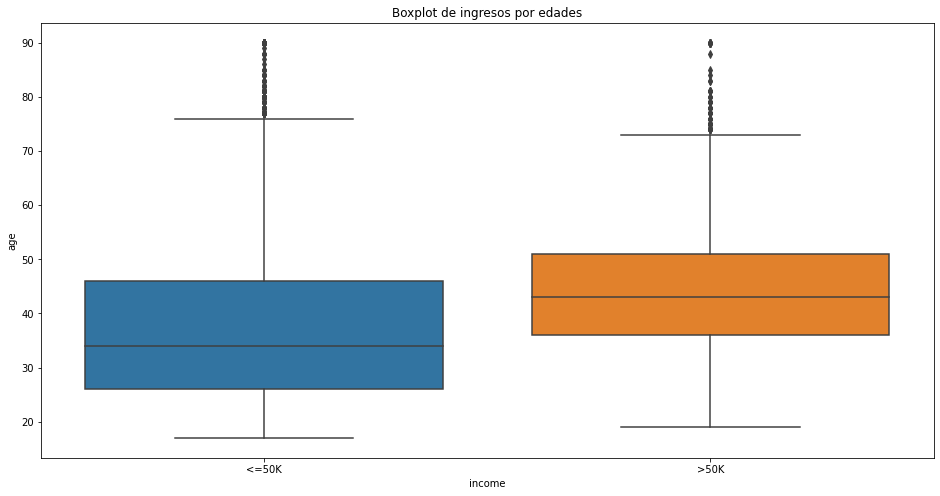

In [51]:
# Visualización de boxplot de ingresos por edades
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x="income", y="age", data=ingresos)
ax.set_title("Boxplot de ingresos por edades")
plt.show()

De lo anterior, la extensión de ingresos (asumiendo continuidad laboral y sin hacer matores análisis en tipos de trabajos) se dan casi de igual manera para ingresos mayores a 50K como en aquellos menores o iguales.

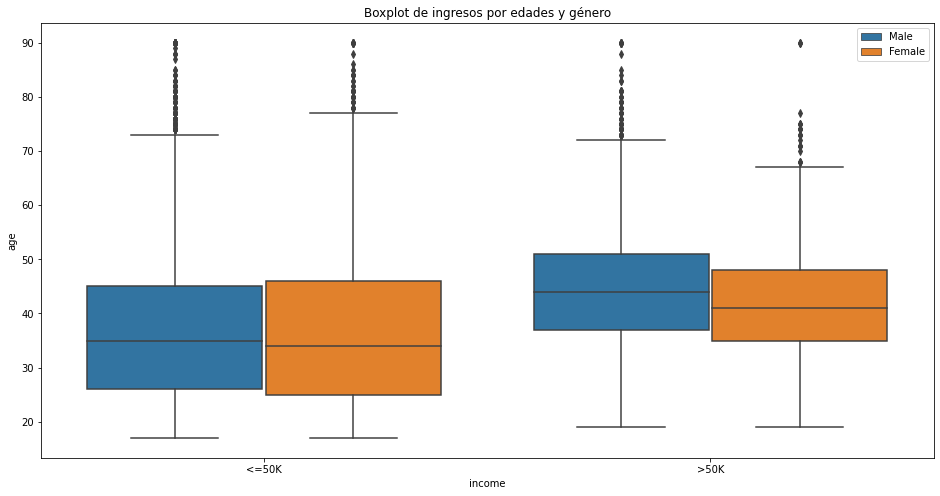

In [53]:
# Visualización de boxplot de ingresos por edades y género
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x="income", y="age", hue="gender", data=ingresos)
ax.set_title("Boxplot de ingresos por edades y género")
ax.legend(loc='upper right')
plt.show()

<Figure size 576x576 with 0 Axes>

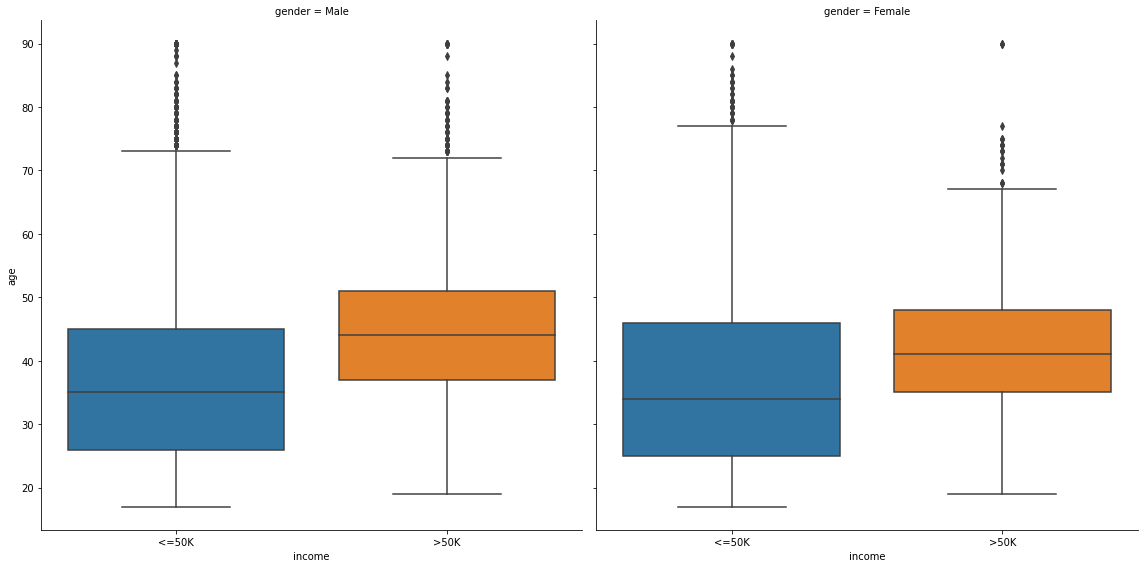

In [54]:
# otra vista de boxplot de ingresos por edades y género
plt.figure(figsize=(8,8))
ax = sns.catplot(x="income", y="age", col="gender", data=ingresos, kind="box", height=8, aspect=1)
plt.show()

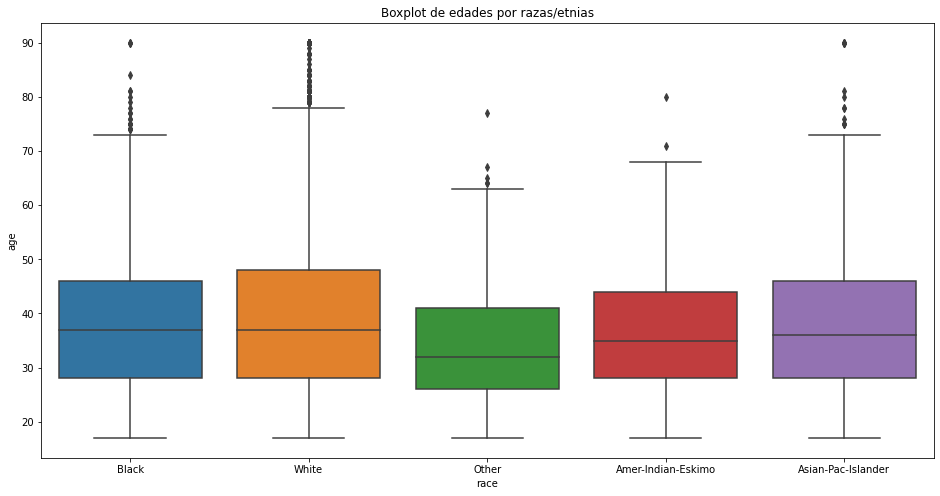

In [56]:
# visualización de boxplot por raza/etnia
plt.figure(figsize=(16,8))
sns.boxplot(x ='race', y="age", data = ingresos)
plt.title("Boxplot de edades por razas/etnias")
plt.show()

In [57]:
# buscando correlaciones
# plot correlation heatmap to find out correlations
ingresos.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.0,-0.07579,0.03762,0.07968,0.05935,0.102
fnlwgt,-0.07579,1.0,-0.04199,-0.00411,-0.004349,-0.01868
educational-num,0.03762,-0.04199,1.0,0.1269,0.08171,0.1462
capital-gain,0.07968,-0.00411,0.1269,1.0,-0.0321,0.08388
capital-loss,0.05935,-0.004349,0.08171,-0.0321,1.0,0.05419
hours-per-week,0.102,-0.01868,0.1462,0.08388,0.05419,1.0


Las correlaciones entre variables en cuestión son bastante bajas.

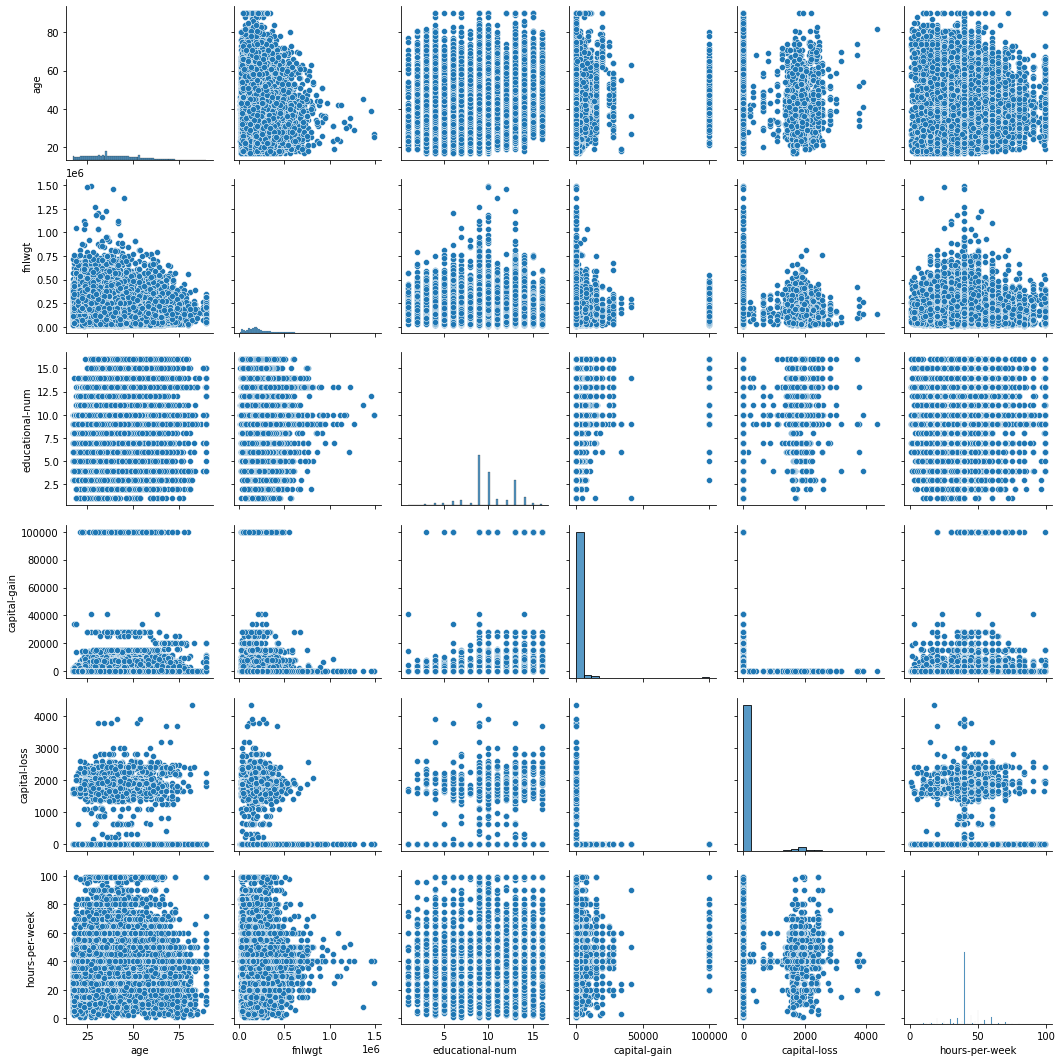

In [58]:
sns.pairplot(ingresos)
plt.show()

Las variables <b><i>age</i></b> y <b><i>fnlwg</i></b>t tienen un sesgo positivo.

La variable <b><i>education_num</i></b> tiene un sesgo negativo, mientras que <b><i>hours_per_week</i></b> tiene una distribución normal.

Existe una débil correlación positiva entre <b><i>capital_gain</i></b> y <b><i>education_num</i></b> <b>(coeficiente de correlación=0,1269)</b>.

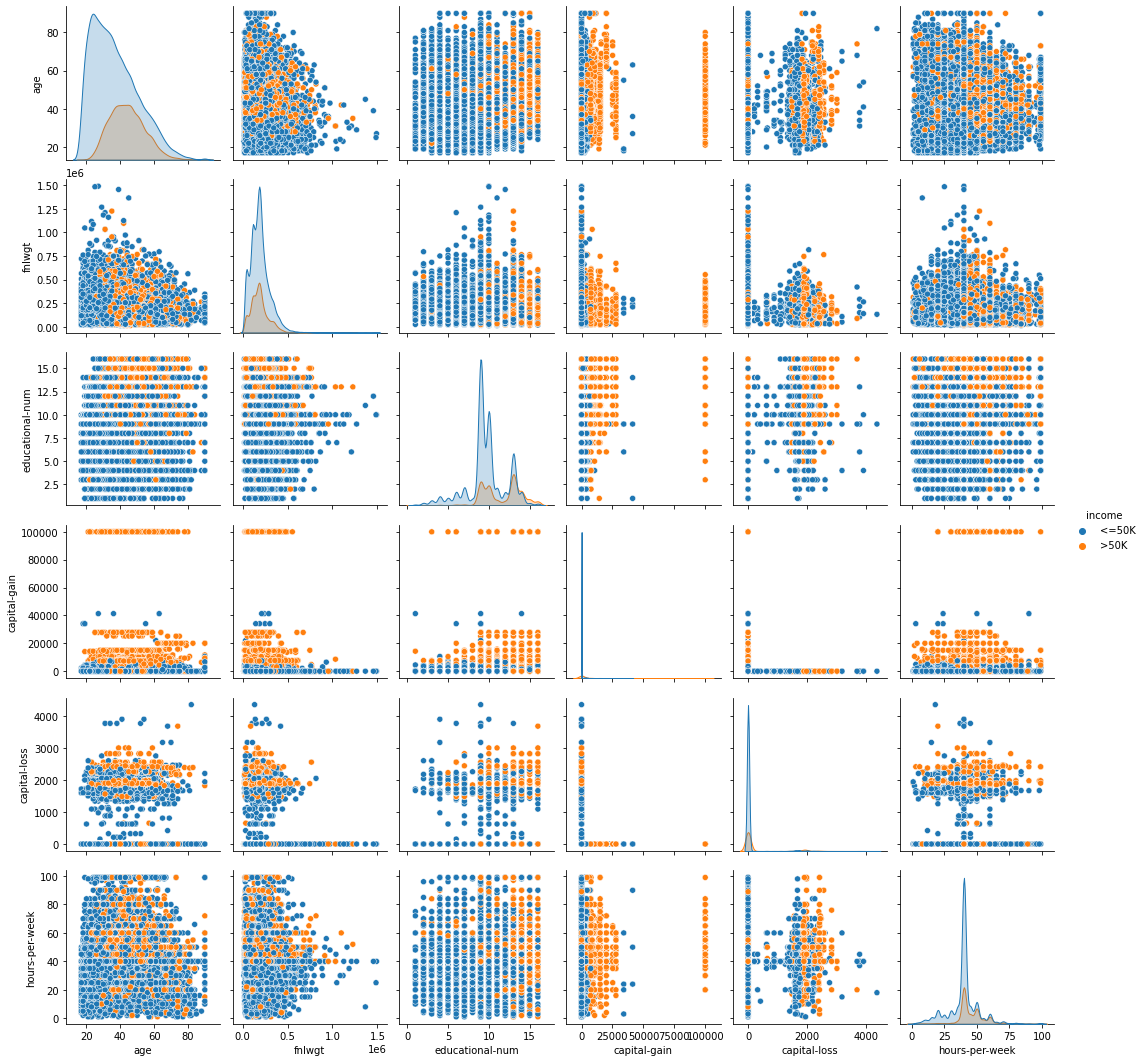

In [59]:
sns.pairplot(ingresos, hue="income")
plt.show()

<h3>Preparando set de datos de Entrenamiento (Training) y Testeo (Test)</h3>

In [60]:
# Dividiendo en set de training y test, con un test_size igual a 30%, random_state igual a 0, y asegurando el 
# objetivolas proporciones de la etiqueta reflejan las del conjunto de datos original.
X = ingresos.drop(['income'], axis=1)
y = ingresos['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [61]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((31655, 14), (13567, 14))

Con el proceso de <i>Ingeniería de características</i> se podrá transformar datos sin procesar características útiles que ayudarán a comprender mejor el modelo y aumentar su poder predictivo.

Realizaré ingeniería de características sobre diferentes tipos de variables.

Primero, recordaré las variables categóricas y numéricas en el conjunto de entrenamiento por separado.

In [62]:
# Para revisar las variables categóricas en el conjunto de entrenamiento
train_cat = [col for col in X_train.columns if X_train[col].dtypes == 'O']
train_cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [63]:
# Para revisar las variables numéricas en el conjunto de entrenamiento
train_num = [col for col in X_train.columns if X_train[col].dtypes != 'O']
train_num

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [64]:
# Ingeniería de missing values para variables categóricas
# Revisando el missing values faltantes en las variables categóricas en el set de entrenamiento
X_train[train_cat].isnull().mean()

workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
native-country    0.0
dtype: float64

Dado los resultados obtenidos, no será necesario tomar acciones como imputacion de datos para missing values.

In [65]:
# Repitiendo misma revisión para set de testeo
X_test[train_cat].isnull().mean()

workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
native-country    0.0
dtype: float64

Nuevamente los datos obtenidos, esta vez para las variables categóricas del set de testeo, no presentan missing values. Dado esto, tampoco será necesario tomar medidas como imputaciones.

Ahora revisaré presencia de valores faltantes para todo el set de datos, tanto testeo como entrenamiento.


In [66]:
# Revisando en el set X_train
X_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [67]:
# Revisando en el set X_test
X_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

Confirmando que no hay 'missing values' en ningundo de los set analizados.

In [68]:
# Retomando variables categóricas
# previsualizando variables categóricas en X_train
X_train[train_cat].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
11134,Private,Assoc-acdm,Widowed,Adm-clerical,Unmarried,Black,Female,United-States
42441,Private,Some-college,Never-married,Sales,Own-child,White,Male,Greece
2888,Private,HS-grad,Never-married,Other-service,Own-child,White,Male,United-States
19470,Self-emp-inc,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
12415,Self-emp-not-inc,Some-college,Divorced,Other-service,Not-in-family,White,Male,United-States


In [69]:
# codificando las variables categóricas 'one-hot encoding'
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race' 
                                 , 'gender', 'native-country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [70]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
11134,47,1,0,0,0,0,0,0,234470,1,...,0,0,0,0,0,0,0,0,0,0
42441,24,1,0,0,0,0,0,0,137591,0,...,0,0,0,0,0,0,0,0,0,0
2888,19,1,0,0,0,0,0,0,78401,0,...,0,0,0,0,0,0,0,0,0,0
19470,43,0,1,0,0,0,0,0,320984,0,...,0,0,0,0,0,0,0,0,0,0
12415,47,0,0,1,0,0,0,0,136258,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_train.shape

(31655, 104)

De esta manera se <i>"tratan"</i> como variables numéricas todas y cada una de los valores de cada variable categóricas de los respectivos sets, pasando de 14 columnas a 104, para el set de entrenamiento. Algo similar ocurre para el set de testeo.

In [72]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
44688,53,1,0,0,0,0,0,0,95540,0,...,0,0,0,0,0,0,0,0,0,0
38106,35,1,0,0,0,0,0,0,438176,0,...,0,0,0,0,0,0,0,0,0,0
29131,26,1,0,0,0,0,0,0,133766,0,...,0,0,0,0,0,0,0,0,0,0
31472,38,1,0,0,0,0,0,0,153066,0,...,0,0,0,0,0,0,0,0,0,0
45120,29,1,0,0,0,0,0,0,48895,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X_test.shape

(13567, 104)

Ahora cuento con un set de datos de entrenamiento y testeo listo para la construcción de modelos. Antes de eso,  mapearé todas las variables de características en la misma escala. A esto de loe llama escalado de características <b><i>feature scaling</i></b>. Se hará de la siguiente manera.

In [74]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

Ahora el set de datos X_train está listo para ingresar al clasificador, en este caso probaré un <b><i>Random Forest</i></b>.

In [75]:
# Modelo de Clasificador de Random Forest con parámetros predeterminados
# creando la instancia del clasificador
rfc = RandomForestClassifier(random_state=0)

# haciendo el fit del modelo con los datos de entrenamiento
rfc.fit(X_train, y_train)

# realizando la predicción de datos con el set de testeo
y_pred = rfc.predict(X_test)

# chequeando el resultado del modelo
print('Puntuación de precisión del modelo con 10 árboles de decisión : {0:0.4f}'. format(accuracy_score(y_test,
                                                                                                        y_pred)))

Puntuación de precisión del modelo con 10 árboles de decisión : 0.8484


<b><i>y_test</i></b> son las <i>"class labels" verdaderas</i> e <b><i>y_pred</i></b> son las <i>"class labels" predichas</i> en el set de testeo.

En este cado se modeló un clasificador Random Forest con el parámetro predeterminado de <b><i>n_estimators = 10</i></b>. Entonces, se usó 10 árboles de decisión para construir el modelo. Ahora, aumentaré el número de árboles de decisión y veré su efecto en la precisión.

In [76]:
# En este caso se realizará con 1000 estimadores
# creando la instancia del clasificador
rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=0)

# haciendo el fit del modelo con los datos de entrenamiento
rfc_1000.fit(X_train, y_train)

# realizando la predicción de datos con el set de testeo
y_pred_1000 = rfc_1000.predict(X_test)

# chequeando el resultado del modelo
print('Puntuación de precisión del modelo con 1000',
      'árboles de decisión : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1000)))

Puntuación de precisión del modelo con 1000 árboles de decisión : 0.8478


Curiosamente aumentando a 1000 estimadores, hubo una leve disminución en la precisión del modelo, de <b>0.8484</b> (con 10 estimadores) a 0.8478. Esto será comentado en los comentarios finales.

La matriz de confusión es una herramienta para resumir el rendimiento de un algoritmo de clasificación. La matriz de confusión dará una imagen clara del rendimiento del modelo de clasificación y los tipos de errores producidos por el modelo. Da un resumen de predicciones correctas e incorrectas desglosadas por cada categoría.

In [77]:
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión\n\n', cm)

Matriz de Confusión

 [[9408  734]
 [1323 2102]]


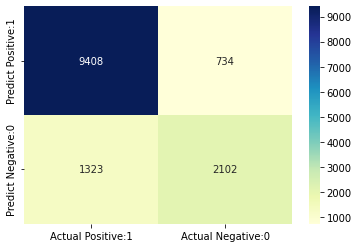

In [78]:
# visualizando la matriz de confusión con mapa de calor
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

El informe de clasificación es otra forma de evaluar el rendimiento del modelo de clasificación. Muestra los scores de <b>precision, recall, f1</b> y <b>support</b> del modelo.

In [79]:
# print del informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     10142
        >50K       0.74      0.61      0.67      3425

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



En esta oportunidad las variables de testeo y de predicción son dicotómicas, [(<=50 K) = 0 ó (>50 K)=1] y no valores continuos, por lo tanto podré hacer uso de la función de scikit-learn <b><i>roc_auc_score</i></b> para graficar la curva ROC y AUC y así visualizar el area bajo la curva, al menos no de manera inmediata y simple.

Recordando la curva AUC - ROC como una medida de rendimiento para los problemas de clasificación, como este, en varias configuraciones de umbral. ROC es una curva de probabilidad y AUC representa el grado o medida de separabilidad. Indica cuánto es capaz el modelo de distinguir entre clases. Cuanto mayor sea el AUC, mejor será el modelo para predecir 0 clases como 0 y 1 clases como 1. Por analogía, cuanto mayor sea el AUC, mejor será el modelo para distinguir entre una opción u otra.

Con algo más de tiempo es algo que vale la pena ajustar el código e incluirlo en el análisis.

<h3>Conclusiones</h3>

En este ejercicio se buscó por medio de algoritmo de clasificación de <i>machine learning</i>, en este caso un Random Forest, ser capaces de predecir los ingresos de una persona bajo el parámetro dicotómico de si son menores o igual a 50K (unidades moentarias) o mayores a 50K, donde se obtuvo:

* Un modelo con 10 estimadores o árboles de precisión, donde la precisión de este modelo fue de 0.8484.
<br><br>
* Un segundo modelo, esta vez con 100 árboles de precisión, donde la precisión de este segundo modelo fue de 0.8478. Teniendo una leve disminución en la precisión no esperada.
<br><br>
* Los resultados de la matriz de confusión y el informe de clasificación son otros criterios para analizar el rendimiento del modelo. Considero estos resultados como un buen rendimiento.
<br><br>
* Si bien se cumple con el onjetivo del ejercicio es posible mejorar el análisis en varios aspectos, además de la incorporación del análisis AUC-ROC, como se mencionó anteriormente. Por motivos de tiempo principalmente, no se profundizó en un análisis respecto a selección de las variables más importantes para el modelo, ni de un <i>tuning parameter</i> apropiado para aquello.
<br><br>
* Sería interesante profundizar en la selección de variables y comparar los resultados de la predicción de este Random Forest contra otros algoritmos y evaluar sus respectivos performances considerando además temas de reducción de dimensiones velando por sesgos y varianzas equilibradas.